In [107]:
import random
import gurobipy as gp
from gurobipy import GRB
import copy
import numpy as np

n=10
def generate_data(n):
    # Initializing an empty adjacency matrix with zeros
    W = [[0] * n for _ in range(n)]

    # Generate random edge weights (assuming non-negative weights)
    for i in range(n):
        for j in range(i+1, n):
            t = random.randint(0,2)
            if t == 0:
                weight = 0
            else:
                weight = random.randint(1,10)
            # weight = random.uniform(0, 2)  # Adjust the range as needed
            # Ensure that edges are undirected by setting W[i][j] = W[j][i] = weight
            W[i][j] = W[j][i] = weight
    return W

In [108]:
def BP(W,n):
    # Create a new model
    m = gp.Model("mip1")
    # Create variable

    x = {}
    x = m.addVars(range(n),vtype = "B", name="x")
    y = m.addVars(range(n),range(n),vtype = "B", name="y")

    m.setObjective(sum(W[i][j]*y[i,j] for i in range(n) for j in range(n)), GRB.MAXIMIZE)
    m.addConstrs(y[i,j]<=(x[i]+x[j]) for i in range(n) for j in range(n))
    m.addConstrs(y[i,j]+x[i]+x[j]<=2 for i in range(n) for j in range(n))
    m.optimize()
    y_result=[]

    for v in x.values():
        if v.X == 0 or v.X==-0:
            y_result.append(0)
        else:
            y_result.append(1)
    return y_result

In [109]:
def count_weight(W:list, A:list, B:list):
    total_weight = 0
    for i in A:
        for j in B:
            total_weight += W[i][j]
    return total_weight

In [110]:
def weight_change(W, A, B, current_weight):
    weight_change_list = []
    for i in range(n):
        temp_A = A.copy()
        temp_B = B.copy()
        if i in A:

            temp_B.append(i)
            temp_A.remove(i)
        else:

            temp_A.append(i)
            temp_B.remove(i)
        new_weight = count_weight(W, temp_A, temp_B)
        result = new_weight - current_weight
        weight_change_list.append(result)
    return weight_change_list

In [111]:
def random_set():
    A = []
    B = []
    xdata_gh = []

    for i in range(n):
        r = random.randint(0,1)
        if r == 0:
            xdata_gh.append(0)
            A.append(i)
        else:
            xdata_gh.append(1)
            B.append(i)
    return xdata_gh, A, B

In [112]:
def GH(W, A, B, n):
    total_weight = count_weight(W, A, B)

    for i in range(n):
        temp_A = A.copy()
        temp_B = B.copy()
        if i in A:
            temp_B.append(i)
            temp_A.remove(i)
        else:
            temp_A.append(i)
            temp_B.remove(i)
        new_weight = count_weight(W, temp_A, temp_B)
        if new_weight >= total_weight:
            A = temp_A
            B = temp_B
            total_weight = new_weight
    A = sorted(A)
    B = sorted(B)
    total_weight = count_weight(W, A, B)
    return total_weight, A, B

In [113]:
def get_data(k):
    A_GH_list = []
    B_GH_list = []
    gh_weight_list = []
    raw_data = []
    xdata1_l = []
    ydata1_l = []

    for i in range(k):
        sum_W = []
        data_list = []
        data = generate_data(n)

        xdata_gh, A, B = random_set()
        gh_weight, A_GH, B_GH = GH(data,A,B,n)

        A_GH_list.append(A_GH)
        B_GH_list.append(B_GH)
        gh_weight_list.append(gh_weight)

        current_weight = count_weight(data,A,B)
        weight_diff = weight_change(data,A,B,current_weight)

        result = BP(data, n)
        ydata1_l.append(result)
        
        for j in data:
            sum_W.append(sum(j))
        data_list.append(sum_W)
        # data_list.append(xdata_gh)
        # data_list.append(weight_diff)
        xdata1_l.append(data_list)
        raw_data.append(data)

    return xdata1_l, ydata1_l, A_GH_list, B_GH_list, gh_weight_list, raw_data

In [114]:
k1 = 500
xtrain_list, ytrain_list, A_GH_train, B_GH_train, gh_weight_train, raw_data = get_data(k1)

k2 = 100
xtest_list, ytest_list, A_GH_test, B_GH_test, gh_weight_test, raw_data = get_data(k2)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 110 columns and 580 nonzeros
Model fingerprint: 0x252d10f9
Variable types: 0 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 130 rows and 65 columns
Presolve time: 0.00s
Presolved: 70 rows, 45 columns, 210 nonzeros
Variable types: 0 continuous, 45 integer (45 binary)
Found heuristic solution: objective 136.0000000

Root relaxation: objective 4.320000e+02, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd  

Cutting planes:
  MIR: 2
  RLT: 10

Explored 1 nodes (70 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 6: 224 214 206 ... -0

Optimal solution found (tolerance 1.00e-04)
Best objective 2.240000000000e+02, best bound 2.240000000000e+02, gap 0.0000%
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 110 columns and 580 nonzeros
Model fingerprint: 0x10f8f6f8
Variable types: 0 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 126 rows and 63 columns
Presolve time: 0.00s
Presolved: 74 rows, 47 columns, 222 nonzeros
V

In [115]:
A_BP = []
B_BP = []

for i in ytest_list:
    temp_A = []
    temp_B = []
    for j in range(len(i)):
        if i[j]>0.5:
            temp_A.append(j)
        else:
            temp_B.append(j)
    A_BP.append(temp_A)
    B_BP.append(temp_B)

In [116]:
BP_result = 0
GH_result = 0
for i in range(len(A_BP)):
    GH_weight = count_weight(raw_data[i], A_GH_test[i], B_GH_test[i])
    BP_weight = count_weight(raw_data[i], A_BP[i], B_BP[i])
    if BP_weight >= GH_weight:
        BP_result += 1
    else:
        GH_result += 1

print(f"Outcome of the BP where they have a higher performance is {BP_result/len(A_BP)}%")
print(f"Outcome of the GH where they have a higher performance is {GH_result/len(A_BP)}%")

Outcome of the BP where they have a higher performance is 1.0%
Outcome of the GH where they have a higher performance is 0.0%


In [117]:
xtrain = np.array(xtrain_list)
xtest = np.array(xtest_list)
ytrain = np.array(ytrain_list)
ytest = np.array(ytest_list)

In [118]:
def precision(y_true, y_pred):

    from tensorflow.keras import backend as K
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):

    from tensorflow.keras import backend as K
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta(y_true, y_pred, beta=1):

    from tensorflow.keras import backend as K
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    #if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
    #    return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score


def f1score(y_true, y_pred):

    return fbeta(y_true, y_pred, beta=1)

In [119]:
import datetime
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

In [142]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

tf.random.set_seed(42)
log_dir = "logs/fit/" + "single_layer"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

xtrain=np.reshape(xtrain,[k1, n])
xtest=np.reshape(xtest,[k2, n])

input_shape = (n, )
nrlayers = 1
nrnodes = [10]
rate = 0.002

model = keras.Sequential()
numclasses = n

for i in range(nrlayers + 1):
    if (i == 0):
        # input layer
        model.add(keras.Input(shape=input_shape))
    else:
        # hidden layers
        nrnode = nrnodes[i - 1]
        model.add(keras.layers.Dense(nrnode, activation="relu"))

model.add(keras.layers.Dense(numclasses, activation="sigmoid"))

model.summary()

batch_size = 30 # Based on SGD --> 1 gradient is calculated using 32 data points every time
#so in each epoch, training_size/batch_size many gradient calculations and weight updates
epochs = 5 # How many times to go through the data to complete the SGD

opt = keras.optimizers.SGD(learning_rate=rate)
model.compile(loss="binary_crossentropy",
                optimizer=opt,
                metrics=[f1score, 'accuracy'])

history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split=0.1,)

score_train = model.evaluate(xtrain, ytrain, verbose=1)
print(f"Train loss: {score_train[0]}, Train accuracy:, {score_train[1]}")

score = model.evaluate(xtest, ytest, verbose=1)
print(f"Test loss: {score[0]}, Test accuracy:, {score[1]}")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 220 (880.00 Byte)
Trainable params: 220 (880.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
15/15 [==============================] - 1s 20ms/step - loss: 10.7464 - f1score: 0.5436 - accuracy: 0.4822 - val_loss: 5.8444 - val_f1score: 0.5553 - val_accuracy: 0.4200
Epoch 2/5
15/15 [==============================] - 0s 5ms/step - loss: 3.6719 - f1score: 0.5722 - accuracy: 0.4156 - val_loss: 2.9896 - val_f1score: 0.4991 - val_accuracy: 0.2800
Epoch 3/5
15/15 [==============================] - 0s 4ms/step - loss: 2.2817 - f1score: 0.5389 - accuracy: 0.2311 - val_loss: 2.3789 - val_f1score: 0.4590 - val_accuracy: 0.1600
Epoch 4/5
15/15 [==============================] - 0s 5ms/step - loss: 1.9332 - f1score: 0.5053 - accuracy: 0.0844 - val_loss: 2.1859 - val_f1score: 0.4332 - val_accuracy: 0.0800
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 1.7516 - f1score: 0.4819 - accuracy: 0.0540
Train loss: 1.7516201734542847, Train accuracy:, 0.4819420576095581
4/4 [==============================] - 0s 1ms/step - loss: 1.6871 - f1score: 0.5017 - accuracy: 0.0

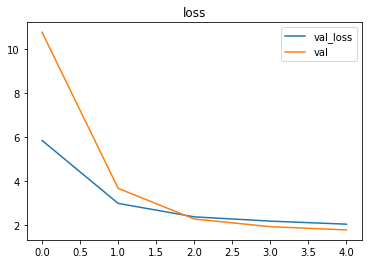

In [143]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='val')
plt.title('loss')
plt.legend()

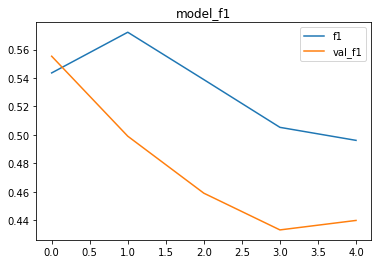

In [144]:
plt.plot(history.history['f1score'], label = 'f1')
plt.plot(history.history['val_f1score'], label = 'val_f1')
plt.title('model_f1')
plt.legend()

In [145]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label = 'accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.title('model_accuracy')
# plt.legend()


In [146]:
pred_f = model.predict(xtest)
pred = pred_f.tolist()
pred = [[round(x) for x in sublist] for sublist in pred]
print(accuracy_score(pred,ytest)*100)

4/4 [==============================] - 0s 1ms/step
0.0


In [147]:
# models1.predict(xtest)
# NN = models1.predict(xtest)
# NN_ytest = NN.tolist()
# NN_ytest = [[int(x) for x in sublist] for sublist in NN_ytest]

In [148]:
A_NN = []
B_NN = []

for i in pred:
    temp_A = []
    temp_B = []
    for j in range(len(i)):
        if i[j]>0.5:
            temp_A.append(j)
        else:
            temp_B.append(j)
    A_NN.append(temp_A)
    B_NN.append(temp_B)

In [149]:
print(A_NN[0:5])
print()
print(B_NN[0:5])

[[1, 2, 3, 4, 6, 7, 9], [0, 4, 5, 8], [0, 6, 7, 9], [2, 3, 7, 9], [0, 4, 5, 6, 8, 9]]

[[0, 5, 8], [1, 2, 3, 6, 7, 9], [1, 2, 3, 4, 5, 8], [0, 1, 4, 5, 6, 8], [1, 2, 3, 7]]


In [150]:
pred

[[0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 0, 1, 0],
 [0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0,

In [151]:
NN_result = 0
GH_result = 0
for i in range(len(A_NN)):
    GH_weight = count_weight(raw_data[i], A_GH_test[i], B_GH_test[i])
    NN_weight = count_weight(raw_data[i], A_NN[i], B_NN[i])
    print(f"GH_weight is {GH_weight}")
    print(f"NN_weight is {NN_weight}")
    print()
    if NN_weight >= GH_weight:
        NN_result += 1
    else:
        GH_result += 1

print(f"Outcome of the MLGH where they have a higher performance is {NN_result/len(A_NN)}%")
print(f"Outcome of the GH where they have a higher performance is {GH_result/len(A_NN)}%")

GH_weight is 111
NN_weight is 80

GH_weight is 106
NN_weight is 103

GH_weight is 113
NN_weight is 77

GH_weight is 132
NN_weight is 93

GH_weight is 139
NN_weight is 121

GH_weight is 106
NN_weight is 106

GH_weight is 72
NN_weight is 73

GH_weight is 98
NN_weight is 89

GH_weight is 110
NN_weight is 98

GH_weight is 123
NN_weight is 106

GH_weight is 120
NN_weight is 104

GH_weight is 121
NN_weight is 65

GH_weight is 134
NN_weight is 77

GH_weight is 119
NN_weight is 93

GH_weight is 110
NN_weight is 101

GH_weight is 123
NN_weight is 107

GH_weight is 111
NN_weight is 95

GH_weight is 101
NN_weight is 93

GH_weight is 116
NN_weight is 104

GH_weight is 85
NN_weight is 70

GH_weight is 111
NN_weight is 73

GH_weight is 136
NN_weight is 103

GH_weight is 131
NN_weight is 100

GH_weight is 123
NN_weight is 106

GH_weight is 77
NN_weight is 51

GH_weight is 127
NN_weight is 62

GH_weight is 134
NN_weight is 101

GH_weight is 104
NN_weight is 67

GH_weight is 109
NN_weight is 76

GH_wei